# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical procedure that utilizes an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This technique is widely used for dimensionality reduction while preserving as much of the variance as possible.

#### Mathematical Formulation of PCA

The mathematical foundation of PCA seeks to find a linear transformation that maximizes the variance of the data in the lower-dimensional space. The first principal component is the direction that maximizes the variance of the projected data. Each subsequent component, in turn, is the direction that maximizes the variance under the constraint that it is orthogonal to the preceding components. The transformation is defined by a set of orthogonal vectors called principal axes.

The covariance matrix of data $X$ is decomposed as $X = W \Lambda W^T$, where $W$ is a matrix of eigenvectors (principal components) and $\Lambda$ is a diagonal matrix of eigenvalues of $X$. Each eigenvector has a corresponding eigenvalue that indicates the variance of the data along that eigenvector. The principal components are selected based on the eigenvalues, with larger eigenvalues corresponding to more important principal components.

#### Assumptions of PCA

- **Linearity**: PCA assumes that the data components have a linear relationship.
- **Large Variances Have Important Structure**: The direction with the largest variance is considered to be the most significant.
- **Orthogonality**: Components are assumed to be orthogonal (uncorrelated).

#### Business Scenario: Recruiting Company

A recruiting company specializes in matching candidates with tech companies. They collect various metrics about candidates, such as technical skills score, soft skills score, years of experience, domain knowledge, and project management skills, to help place them in suitable roles.

#### Business Problem

The company wants to streamline its candidate evaluation process by reducing the number of variables without losing critical information that helps in decision-making. The goal is to identify the most influential factors affecting a candidate's suitability for tech roles, enabling more efficient and focused assessments.

#### Generating Data

Let's simulate data for 1000 candidates across the mentioned five metrics.

In [6]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Generate synthetic data with a slight correlation structure
n_samples = 1000
technical_skills = np.random.normal(0, 1, n_samples)
soft_skills = technical_skills * 0.5 + np.random.normal(0, 1, n_samples) * 0.5
experience_years = soft_skills * 0.5 + np.random.normal(0, 1, n_samples) * 0.5
domain_knowledge = np.random.normal(0, 1, n_samples)
project_management = domain_knowledge * 0.5 + np.random.normal(0, 1, n_samples) * 0.5

# Create a DataFrame
data = np.vstack([technical_skills, soft_skills, experience_years, domain_knowledge, project_management]).T
columns = ['Technical_Skills', 'Soft_Skills', 'Experience_Years', 'Domain_Knowledge', 'Project_Management']
df = pd.DataFrame(data, columns=columns)


#### Principal Component Analysis Assumption Checks
Outlined below are the foundational assumption checks for PCA. Our objective is focused on illustrating model interpretation, leading to a more flexible approach in verifying these assumptions, which we consider to be sufficiently met for this context. However, it's important to note that in practical applications and for more detailed presentations, a thorough and in-depth analysis of these assumptions is essential.

**1. Linearity**  
The pair plots should show roughly linear relationships among some variables, especially those we've synthetically correlated. Some scatter plots might display less clear patterns due to the added noise, which is typical in real datasets.

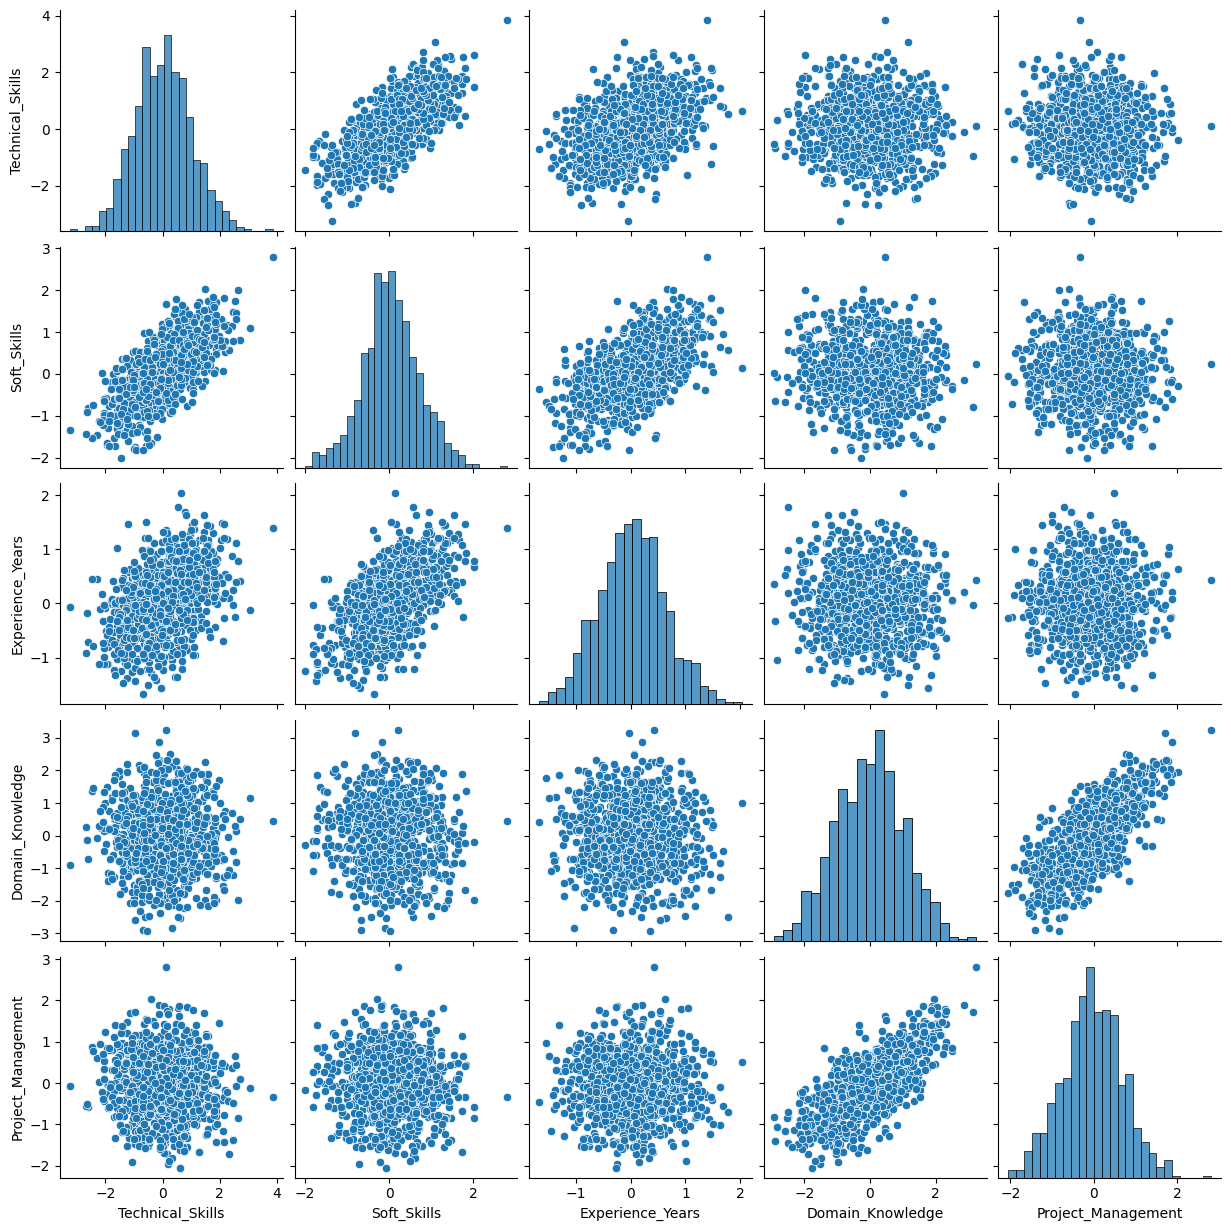

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to inspect linearity
sns.pairplot(df)
plt.show()


**2. Large Variance Signify Important Structure**  
The dataset is going to be standardized to give each feature equal importance initially. After PCA, the explained variance ratio to verify this assumption will be examined.

In [8]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

**3. Features are Uncorrelated**  
The heatmap provides a visual and numerical representation of the correlation among features. Ideally, we should observe low correlation coefficients (close to 0) off the diagonal, indicating that our features are not heavily correlated. Some correlation is expected due to the synthetic relationships we introduced.

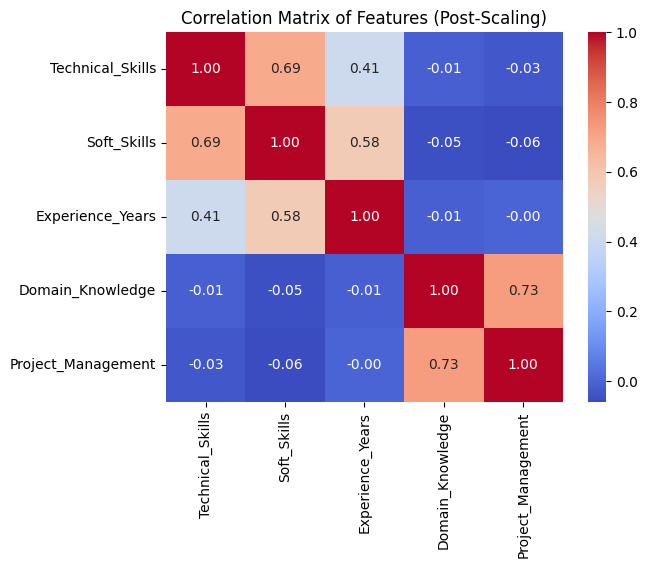

In [9]:
# Check for correlation among features
correlation_matrix = np.corrcoef(data_scaled.T)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=columns, yticklabels=columns)
plt.title('Correlation Matrix of Features (Post-Scaling)')
plt.show()

**Conducting PCA**  

In [16]:
from sklearn.decomposition import PCA

# Performing PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

print("Explained variance ratio:", *["{:.2f}".format(ratio) for ratio in explained_variance_ratio])

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=columns)
print(loading_df)

Explained variance ratio: 0.43 0.34
                         PC1       PC2
Technical_Skills    0.826531  0.133832
Soft_Skills         0.902493  0.109350
Experience_Years    0.758222  0.149560
Domain_Knowledge   -0.172268  0.912966
Project_Management -0.181495  0.911479


#### Interpretation of PCA Results
The Principal Component Analysis (PCA) results, including the explained variance ratios and the PCA loadings, provide significant insights into the recruiting company's candidate evaluation process. The explained variance ratios for the first two principal components (PCs) were 0.43 and 0.34, indicating that together, they account for 77% of the variance within the dataset. This high percentage of explained variance justifies the reduction of the original five variables to two principal components, facilitating a more efficient evaluation process without substantial loss of information.

**PCA Loadings Interpretation**  
The loadings for the first two principal components are as follows:

|                    | PC1      | PC2      |
|--------------------|----------|----------|
| Technical_Skills   | 0.826531 | 0.133832 |
| Soft_Skills        | 0.902493 | 0.109350 |
| Experience_Years   | 0.758222 | 0.149560 |
| Domain_Knowledge   | -0.172268| 0.912966 |
| Project_Management | -0.181495| 0.911479 |

These loadings indicate how each original variable contributes to the principal components. For PC1, Technical_Skills, Soft_Skills, and Experience_Years have strong positive loadings, indicating that this component primarily represents candidates' skills and experience aspects. In contrast, Domain_Knowledge and Project_Management significantly contribute to PC2, suggesting this component reflects candidates' specific knowledge and management skills.

**Justification for Choosing Two PCs**  
Two principal components were chosen based on the cumulative explained variance ratio, which surpasses the 75% threshold, indicating that these components retain the majority of the information present in the original dataset. This decision aligns with the objective of dimensionality reduction while maintaining a significant amount of the original data's variance. Additionally, focusing on two components simplifies the analysis and interpretation without oversimplifying the candidates' multifaceted profiles.

**Meaning of PC1 and PC2**  
- **PC1:** The first principal component is a measure of the candidates' general skills and experience. Given its high loadings on Technical_Skills, Soft_Skills, and Experience_Years, PC1 can be interpreted as representing the overall competency of a candidate in terms of foundational skills and professional experience.
- **PC2:** The second principal component distinguishes candidates based on their Domain_Knowledge and Project_Management skills. This component differentiates candidates who have specific expertise and management capabilities, which are crucial for certain technical roles.

**Interpretation and Recommendations** 
Given the loadings and the explained variance, it is recommended that the recruiting company prioritize candidates' general skills and experience (as represented by PC1) for a broad range of tech roles. For specialized positions requiring specific expertise and leadership skills, the focus should shift towards attributes represented by PC2.

**Future Plan or Analysis**  
Further analysis could explore the practical implications of these findings in the recruiting process. For instance, developing a scoring system based on PC1 and PC2 could streamline candidate ranking and selection. Additionally, predictive modeling could leverage these principal components to forecast candidates' success in specific roles, thereby enhancing the recruitment strategy's effectiveness.